<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/nlp_yelp_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Reviews sentiment analysis

## Data preparation

In [186]:
#Download dataset
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/yelp.csv

--2021-09-07 11:29:18--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/yelp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8091185 (7.7M) [text/plain]
Saving to: ‘yelp.csv.1’

yelp.csv.1          100%[===================>]   7.72M  --.-KB/s    in 0.1s    

2021-09-07 11:29:19 (68.4 MB/s) - ‘yelp.csv.1’ saved [8091185/8091185]



In [187]:
# Turn csv into pandas DataFrame
import pandas as pd
import numpy as np
import tensorflow as tf
df = pd.read_csv("/content/yelp.csv")
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [188]:
#Shuffle the dataframe
df_shuffled = df.sample(frac=1, random_state=42)
df_shuffled.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
6252,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2
4684,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0
1731,j0Uc-GuOe-x9_N_IK1KPpA,2009-05-09,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order ...",review,0VfJi9Au0rVFVnPKcJpt3Q,0,0,0
4742,RBiiGw8c7j-0a8nk35JO3w,2010-12-22,z6y3GRpYDqTznVe-0dn--Q,1,"My husband and I were really, really disappoin...",review,lwppVF0Yqkuwt-xaEuugqw,2,2,2
4521,U8VA-RW6LYOhxR-Ygi6eDw,2011-01-17,vhWHdemMvsqVNv5zi2OMiA,5,Love this place! Was in phoenix 3 weeks for w...,review,Y2R_tlSk4lTHiLXTDsn1rg,0,1,0


In [189]:
#How many different ratings
df_shuffled.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

### Remove Stopwords

In [286]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [291]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
print(len(STOPWORDS))
print(STOPWORDS)

179
{'before', 'they', 'myself', 'in', 'yours', "she's", 'being', 'just', "didn't", 'ma', 'themselves', 'its', 'most', 've', 'it', "shan't", 'and', "wasn't", "couldn't", 'from', 'over', 'are', 'him', 'as', 'off', 'that', 'to', 'should', 'when', 'until', 'below', 'on', 'their', 'an', 'wasn', 'all', 'having', 'does', 'there', "should've", 'm', 'am', 'been', 'have', 'you', "don't", 'her', 'about', 't', 'them', 'needn', 'those', 'shouldn', 'who', 'me', 'hadn', 'll', "hasn't", 'only', 'hers', 'why', 'very', "won't", 'out', 'she', 'has', 'yourself', 'i', 'here', 'where', "wouldn't", 'again', 'nor', 'this', 'shan', 'such', "you're", 'mustn', "haven't", 'can', 'so', 'is', 'under', 'through', 'further', 'between', 'ours', 'now', 'how', 'down', 'himself', 'own', 'd', 'don', 'won', 'wouldn', 'a', 'same', 're', 'had', 'at', 'doesn', 'my', 'did', 'against', 'once', 'no', 'few', 'ain', 's', 'doing', 'what', 'if', "it's", 'both', "doesn't", 'haven', 'each', 'theirs', 'couldn', 'our', 'during', 'with'

In [293]:
print(df_shuffled["text"][0])
print(len(df_shuffled["text"][0]))

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
889


In [298]:
df_shuffled["text_stopwords"] = df_shuffled["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [299]:
print(df_shuffled["text_stopwords"][0])
print(len(df_shuffled["text_stopwords"][0]))

My wife took birthday breakfast excellent. The weather perfect made sitting outside overlooking grounds absolute pleasure. Our waitress excellent food arrived quickly semi-busy Saturday morning. It looked like place fills pretty quickly earlier get better. Do favor get Bloody Mary. It phenomenal simply best I've ever had. I'm pretty sure use ingredients garden blend fresh order it. It amazing. While EVERYTHING menu looks excellent, I white truffle scrambled eggs vegetable skillet tasty delicious. It came 2 pieces griddled bread amazing absolutely made meal complete. It best "toast" I've ever had. Anyway, I can't wait go back!
633


### Aggregate star rating

In [300]:
#Create new star rating - if stars == 1 or 2 then 1, 3 = 2, 4 and 5 = 3
stars_aggregated = []
for row in df_shuffled["stars"]:
  if row == 1 or row == 2:
    stars_aggregated.append(1)
  elif row == 3:
    stars_aggregated.append(2)
  elif row == 4 or row ==5:
    stars_aggregated.append(3)

In [301]:
len(stars_aggregated)

10000

In [302]:
df_shuffled["stars_aggregated"] = stars_aggregated

In [303]:
#How many different ratings
df_shuffled.stars_aggregated.value_counts()

3    6863
1    1676
2    1461
Name: stars_aggregated, dtype: int64

In [304]:
df_shuffled.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,stars_aggregated,text_stopwords
6252,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,3,We got around midnight last Friday... place de...
4684,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0,3,Brought friend Louisiana here. She says crawfi...
1731,j0Uc-GuOe-x9_N_IK1KPpA,2009-05-09,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order ...",review,0VfJi9Au0rVFVnPKcJpt3Q,0,0,0,2,"Every friday, dad I eat here. We order thing....."
4742,RBiiGw8c7j-0a8nk35JO3w,2010-12-22,z6y3GRpYDqTznVe-0dn--Q,1,"My husband and I were really, really disappoin...",review,lwppVF0Yqkuwt-xaEuugqw,2,2,2,1,"My husband I really, really disappointed exper..."
4521,U8VA-RW6LYOhxR-Ygi6eDw,2011-01-17,vhWHdemMvsqVNv5zi2OMiA,5,Love this place! Was in phoenix 3 weeks for w...,review,Y2R_tlSk4lTHiLXTDsn1rg,0,1,0,3,Love place! Was phoenix 3 weeks work. Ate 3 ti...


In [305]:
#get info about the dataframe
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 6252 to 7270
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   business_id       10000 non-null  object
 1   date              10000 non-null  object
 2   review_id         10000 non-null  object
 3   stars             10000 non-null  int64 
 4   text              10000 non-null  object
 5   type              10000 non-null  object
 6   user_id           10000 non-null  object
 7   cool              10000 non-null  int64 
 8   useful            10000 non-null  int64 
 9   funny             10000 non-null  int64 
 10  stars_aggregated  10000 non-null  int64 
 11  text_stopwords    10000 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.3+ MB


In [306]:
#Visualize some random examples
import random
random_index = random.randint(0, len(df_shuffled)-5)
for row in df_shuffled[["text_stopwords", "stars_aggregated"]][random_index:random_index+5].itertuples():
  _, text, stars = row
  print(f"Text: {text}")
  print(f"Rating: {stars}\n")

Text: Great food, clean bit old nice
Rating: 3

Text: The Westin Kierland beautiful resort located PHOENIX, Scottsdale. Some close friends mine Canada stayed PHOENIX resort days, I've hung rooms generally lounged property. The rooms impressive, beautifully decorated, spacious. We especially enjoyed taking kids small fire pits maintained grounds, guests fine city PHOENIX roast marshmallows. The Kierland tough competition, considering city PHOENIX every one famous resorts Valley, Biltmore, Phoenician Royal Palms. It pretty well tough line-up. No offense Scottsdale, also great resorts Four Seasons. It's famous ones PHOENIX. [For information, please visit: http://phoenix.gov/BNDMAPS/index.html]
Rating: 3

Text: I fan. But I would like fan, I harping two problems I CC. One parking mentioned reviewers bad service food court. I mean samples handed almost every aisle hassle lines stereotypical fat people line like hippos rotten carcass 'just try sample'. I mean little restaurant inside store h

### Split dataset

In [307]:
np.random.seed(42)
perm = np.random.permutation(df_shuffled.index)
m = len(df_shuffled)
train_end = int(0.6 * m)
validate_end = int(0.2 * m) + train_end
train = df_shuffled.iloc[perm[:train_end]]
validate = df_shuffled.iloc[perm[train_end:validate_end]]
test = df_shuffled.iloc[perm[validate_end:]]

In [308]:
len(train), len(validate), len(test)

(6000, 2000, 2000)

In [309]:
#Turn dataframes into numpy arrays
train_sentences = train["text_stopwords"].to_numpy()
train_labels = train["stars_aggregated"].to_numpy()
val_sentences = validate["text_stopwords"].to_numpy()
val_labels = validate["stars_aggregated"].to_numpy()
test_sentences = test["text_stopwords"].to_numpy()
test_labels = test["stars_aggregated"].to_numpy()
train_sentences.shape, val_sentences.shape, test_sentences.shape

((6000,), (2000,), (2000,))

### One hot encode labels

In [310]:
#One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_labels.reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_labels.reshape(-1, 1))

In [311]:
train_labels_one_hot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [312]:
z = random.randint(0, 6000)
print(train_labels_one_hot[z])
print(train_labels[z])

[0. 0. 1.]
3


In [313]:
train_sentences[:5], test_sentences[:5], val_sentences[:5]

(array(["Was Zinc last night say place keeps getting better still. Started crepes again, perfect again. Then shared scallops lamb shank dinner. I'm usually huge fan lamb OR scallops recommended I feeling adventurous. The lamb - AMAZING. Melt mouth wonderful. More like stew anything classic fall bone tender meat creamy cheesy polenta. Their bread perfect French bread too. This time year (winter) festive, buzzy energy good crowd TOO long wait. Make reservations though sure. Oh, Bobby's across way Kierland nice spot pre-dinner drink (400s Hollywood glamour meets The Jetsons cool live jazz parents grandparents would enjoyed back day).",
        'Am ashamed say I filled punch card, twice. Usually get Hook Ladder. But main reason I keep going back...the magical Coke machine Awesomeness.',
        'Jesse I lovely evening out- great dishes owner server well. He belts lovely Italian birthday song playing guitar. Very nice',
        'Hit miss. Pretty much perfect definition "HoHo". My friend I l

In [314]:
train_labels[:5], test_labels[:5], val_labels[:5]

(array([3, 3, 3, 2, 1]), array([3, 3, 3, 3, 3]), array([3, 2, 2, 3, 3]))

In [315]:
#Turn data into TensorFlwo Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [316]:
#Prefetch dataset 
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [317]:
train_dataset

<PrefetchDataset shapes: ((None,), (None, 3)), types: (tf.string, tf.float64)>

In [318]:
len(train_dataset)

188

## Create Text Vectorization layer

In [319]:
#find average number of words in training sentences
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

77.25416666666666

(array([3931., 1515.,  402.,   97.,   35.,   16.,    4.]),
 array([  1.,  83., 165., 247., 329., 411., 493., 575.]),
 <a list of 7 Patch objects>)

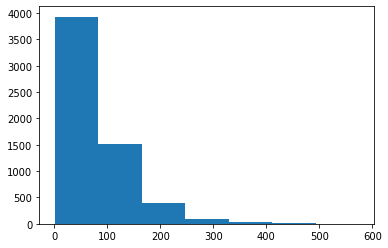

In [320]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7)

In [321]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

203

In [322]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 10000
max_length = output_seq_len

#Use default variables
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [323]:
#Fit vectorizer to train sentences
text_vectorizer.adapt(train_sentences)

In [324]:
#Test vectorizer on random samples
random_sentence = random.choice(train_sentences)
print(f"Original text: \n{random_sentence}\
\n\nVectorized version:")
text_vectorizer([random_sentence])

Original text: 
i'd rather go amado's! thing that's good bean dip, i'm saying something nice say.

Vectorized version:


<tf.Tensor: shape=(1, 203), dtype=int64, numpy=
array([[196, 514,  12,   1, 123, 158,   4, 965, 842,  22, 753,  92,  24,
         69,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   

In [325]:
#Check unique tokens in vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(words_in_vocab)}")

Number of words in vocab: 10000


## Create Embedding layer

In [326]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

In [327]:
# Test Embedding layer on random samples
random_sentence = random.choice(train_sentences)
print(f"Original text: \n{random_sentence}\
\n\nEmbedded version:")
embedding(text_vectorizer([random_sentence]))

Original text: 
3 friends I went restaurant week. Iruna great ambiance charm. The service top-notch, server made excellent wine recommendations. The desserts amazing. The food ok. Here's had: tapas - tortilla espanola (which complimentary) delicious; chistorra (chorizo cider w/ baby artichokes) also good; pan con tomate surprising seem tapas. rather huge chunks grilled bread work well distribute flavors oily. entrees - trout salsa navarra, eggplant, roasted peppers, onion tomato nicely cooked nice balance flavors. filet mignon tomatoes salbitxada order medium rare delivered well done over-salted. It refired, v2 right temperature still over-salted. glanced patio way looks fantastic. We return try tapas sangria outdoor couches.

Embedded version:


<tf.Tensor: shape=(1, 203, 128), dtype=float32, numpy=
array([[[-4.0549733e-02,  7.9969987e-03, -4.5296133e-02, ...,
         -3.0604005e-03, -8.1658363e-05,  2.5796000e-02],
        [ 3.0817930e-02, -1.2068499e-02, -1.2853753e-02, ...,
          5.2326694e-03, -3.8556494e-02,  4.9526915e-03],
        [-2.3679292e-02, -3.4403242e-02,  1.5710678e-02, ...,
         -4.9291637e-02,  4.1153517e-02, -4.2632427e-02],
        ...,
        [ 2.7203951e-02,  3.1140652e-02, -2.9220974e-02, ...,
         -3.2705702e-02,  2.0541038e-02,  2.0514857e-02],
        [ 2.7203951e-02,  3.1140652e-02, -2.9220974e-02, ...,
         -3.2705702e-02,  2.0541038e-02,  2.0514857e-02],
        [ 2.7203951e-02,  3.1140652e-02, -2.9220974e-02, ...,
         -3.2705702e-02,  2.0541038e-02,  2.0514857e-02]]], dtype=float32)>

## Create Character level tokenizer

In [328]:
#Function for splitting sentences into characters
def split_chars(text):
  return " ".join(list(text))

In [329]:
#Split sequence-level data into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

W a s   Z i n c   l a s t   n i g h t   s a y   p l a c e   k e e p s   g e t t i n g   b e t t e r   s t i l l .   S t a r t e d   c r e p e s   a g a i n ,   p e r f e c t   a g a i n .   T h e n   s h a r e d   s c a l l o p s   l a m b   s h a n k   d i n n e r .   I ' m   u s u a l l y   h u g e   f a n   l a m b   O R   s c a l l o p s   r e c o m m e n d e d   I   f e e l i n g   a d v e n t u r o u s .   T h e   l a m b   -   A M A Z I N G .   M e l t   m o u t h   w o n d e r f u l .   M o r e   l i k e   s t e w   a n y t h i n g   c l a s s i c   f a l l   b o n e   t e n d e r   m e a t   c r e a m y   c h e e s y   p o l e n t a .   T h e i r   b r e a d   p e r f e c t   F r e n c h   b r e a d   t o o .   T h i s   t i m e   y e a r   ( w i n t e r )   f e s t i v e ,   b u z z y   e n e r g y   g o o d   c r o w d   T O O   l o n g   w a i t .   M a k e   r e s e r v a t i o n s   t h o u g h   s u r e .   O h ,   B o b b y ' s   a c r o s s   w a y   K i e r l a n d   

In [330]:
#What´s the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

493.47066666666666

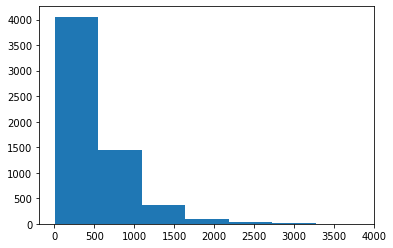

In [331]:
# Check distribution
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [332]:
#What character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

1304

In [333]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [334]:
#Create char level vectorizer
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation")

## Create Character level embedding

In [335]:
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                              output_dim=25, 
                              mask_zero=False)

## Modelling experiments

### Model 1: Dense

In [336]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [337]:
model_1.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [338]:
%%time
history_model_1 = model_1.fit(train_dataset,
                              epochs=500,
                              verbose=0,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

CPU times: user 2.76 s, sys: 308 ms, total: 3.06 s
Wall time: 2.56 s


In [339]:
def plot_training_curve(history):
  plt.figure(figsize=(10,7))
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.legend()
  plt.title("Training curve")
  plt.figure(figsize=(10,7))
  plt.plot(accuracy, label="accuracy")
  plt.plot(val_accuracy, label="val_accuracy")
  plt.legend()
  plt.title("Training curve")

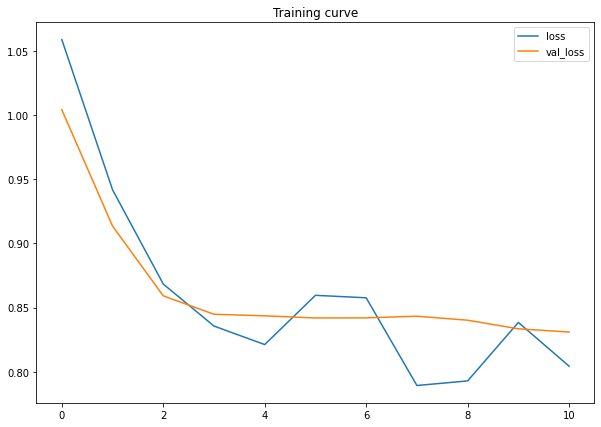

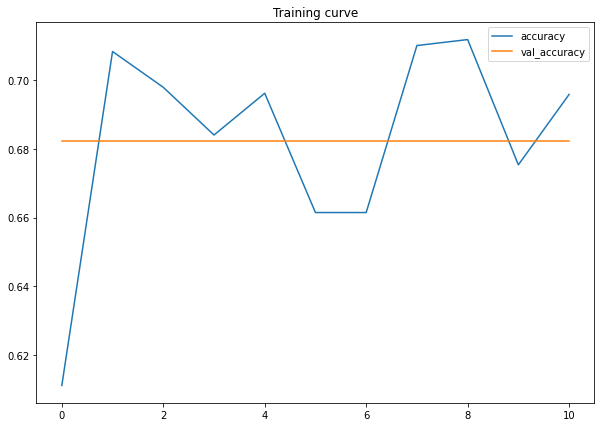

In [340]:
plot_training_curve(history_model_1)

In [341]:
#Evaluate
model_1.evaluate(test_dataset)

63/63 [==============================] - 0s 5ms/step - loss: 0.8255 - accuracy: 0.6770


[0.825497567653656, 0.6769999861717224]

### Model 2: Conv1D

In [342]:
#Built the model
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
embeddings = embedding(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(embeddings)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [343]:
#Compile the model 
model_2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [344]:
#Fit the model 
%%time
history_model_2 = model_2.fit(train_dataset,
                              epochs=500,
                              verbose=0,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=0),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

CPU times: user 3.16 s, sys: 294 ms, total: 3.46 s
Wall time: 3.19 s


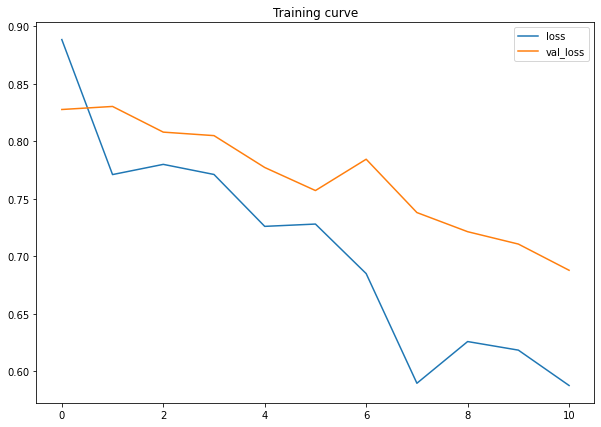

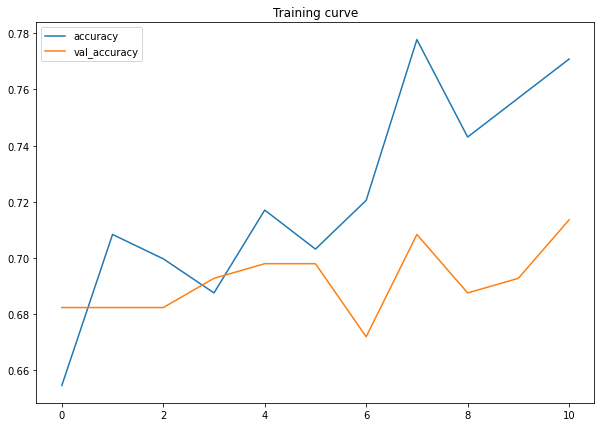

In [345]:
plot_training_curve(history_model_2)

In [346]:
#Evaluate
model_2.evaluate(test_dataset)

63/63 [==============================] - 0s 5ms/step - loss: 0.6268 - accuracy: 0.7420


[0.626798152923584, 0.7419999837875366]

### Model 3: Feature extraction GRU

In [347]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [348]:
#Build the model 
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(pretrained_embedding)
x = layers.Bidirectional(layers.GRU(128, return_sequences=True))(x)
x = layers.Dropout(0.2)(x)
x = layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x = layers.Dropout(0.2)(x)
x = layers.Bidirectional(layers.GRU(32))(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs)

In [349]:
#Compile the model 
model_3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [350]:
%%time
#Fit the model 
history_model_3 = model_3.fit(train_dataset,
                              epochs=100, 
                              verbose=0,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)])


Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping
CPU times: user 1min 21s, sys: 7.7 s, total: 1min 29s
Wall time: 1min 25s


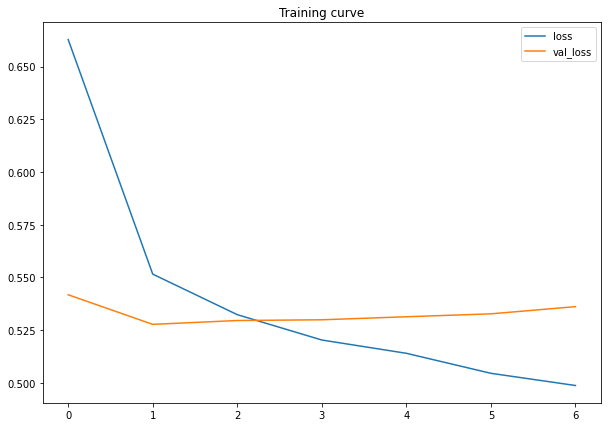

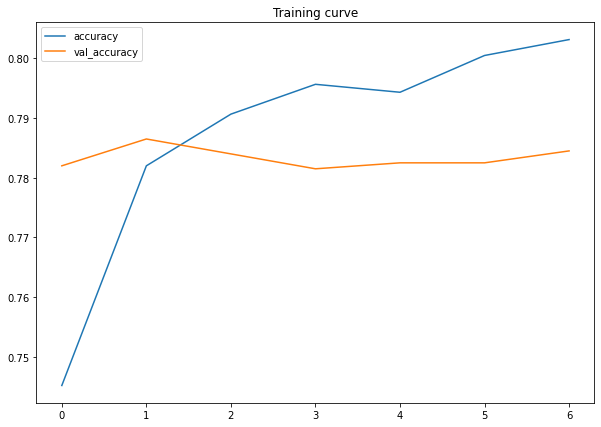

In [351]:
plot_training_curve(history_model_3)

In [352]:
#Evaluate
model_3.evaluate(test_dataset)

63/63 [==============================] - 2s 31ms/step - loss: 0.6001 - accuracy: 0.7590


[0.6001099944114685, 0.7590000033378601]

### Model 4: Feature extraction Conv1D

In [353]:
#Build the model 
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(pretrained_embedding)
x = layers.Conv1D(256, kernel_size=5, padding="same", activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(128, kernel_size=5, padding="same", activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(32, kernel_size=5, padding="same", activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(16, kernel_size=5, padding="same", activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_4 = tf.keras.Model(inputs, outputs)

In [354]:
#Compile the model 
model_4.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [355]:
%%time
#Fit the model 
history_model_4 = model_4.fit(train_dataset,
                              epochs=100, 
                              batch_size=128,
                              verbose=0,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)]
                                         )


Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Restoring model weights from the end of the best epoch.
Epoch 00012: early stopping
CPU times: user 1min 38s, sys: 8.56 s, total: 1min 46s
Wall time: 1min 31s


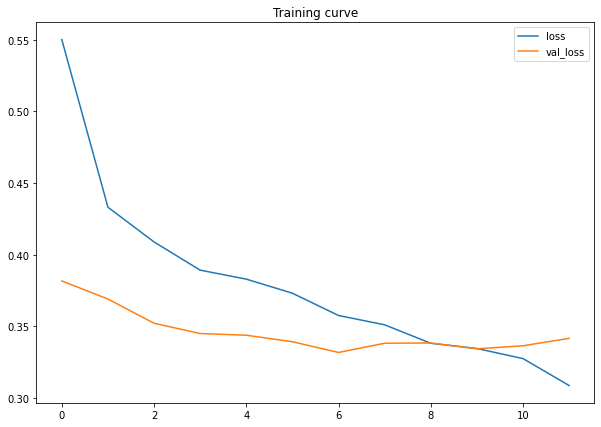

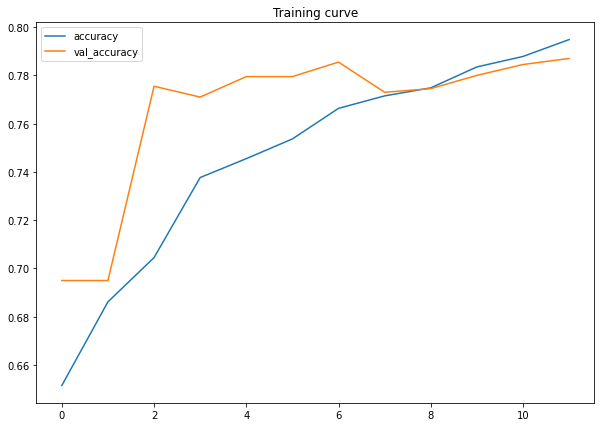

In [356]:
plot_training_curve(history_model_4)

In [357]:
#Evaluate
model_4.evaluate(test_dataset)

63/63 [==============================] - 2s 27ms/step - loss: 0.3682 - accuracy: 0.7590


[0.36822909116744995, 0.7590000033378601]

### Feature extraction GRU Conv1D

In [389]:
#Build the model 
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(pretrained_embedding)
x = layers.Conv1D(512, kernel_size=12, padding="same", activation="relu")(x)
x = layers.Dropout(0.6)(x)
x = layers.GRU(256, return_sequences=True)(x)
x = layers.Dropout(0.6)(x)
x = layers.Conv1D(256, kernel_size=12, padding="same", activation="relu")(x)
x = layers.GRU(128, return_sequences=True)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(64)(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(32)(x)
x = layers.Dropout(0.6)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_5 = tf.keras.Model(inputs, outputs)

In [390]:
#Compile the model 
model_5.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [391]:
%%time
#Fit the model 
history_model_5 = model_5.fit(train_dataset,
                              epochs=100, 
                              verbose=0,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)]
                                         )


Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Restoring model weights from the end of the best epoch.
Epoch 00010: early stopping
CPU times: user 1min 37s, sys: 8 s, total: 1min 45s
Wall time: 1min 44s


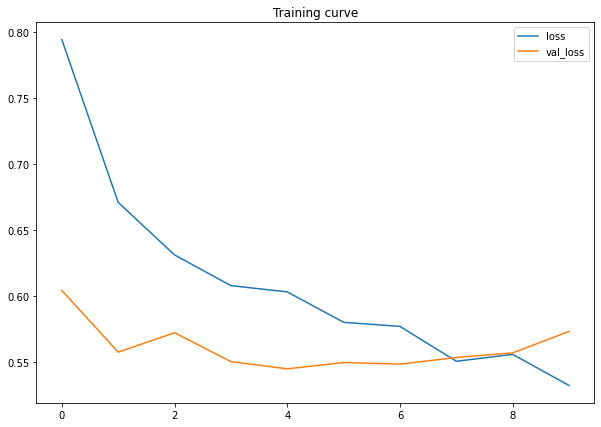

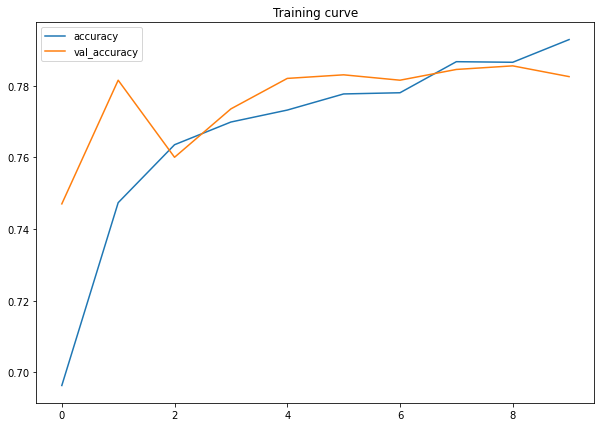

In [392]:
plot_training_curve(history_model_5)

In [393]:
#Evaluate
model_5.evaluate(test_dataset)

63/63 [==============================] - 2s 34ms/step - loss: 0.6131 - accuracy: 0.7480


[0.6131190061569214, 0.7480000257492065]